In [173]:
import numpy as np
import scipy.stats as scstats
import matplotlib.pyplot as plt

In [174]:
rng = np.random.default_rng()

## Problem 1

Each game consists of $n$ Bernoulli trials with probability of success $p$ and that of loss $q = 1 - p$. If we start with an amount $c$ then at the end of the game we will have $c \times g^s \times l^{n-s}$, where $g$ is gain on success, $l$ is the loss and $s$ is the number of successes. Thus, our random variable is $Y = r(X)$, where $X$ is a Bernoulli random variable and $r(s) = g^s l^{n-s}$. Therefore,
$$
E(Y) = \int r(x)dF = \sum_{s=0}^n p(X=s)r(s),
$$
since
$$
p(s) = \sum_{s=0}^n \binom{n}{s}p^s q^{n-s} 
$$
we have
$$
E(Y) = \sum_{s=0}^n (gp)^s (lq)^{n-s} = (gp + lq)^n.
$$

If $g = 2$, $l = 1/2$ and $p = 1/2$, the expected amount is $(5/4)^n c$.

In [175]:
nGames = 10000
nTrials = 30 # Each game has these many Bernoulli trials.
outcomes = rng.binomial(n=1, p=0.5, size=(nGames, nTrials)) 
initAmount = 1.0

def payoffFactor(outcome: int) -> float:
    return 2 if outcome == 1 else 0.5

finalAmounts = [initAmount * np.prod([payoffFactor(n) for n in outcomes[i]]) for i in range(nGames)]
print(f'Actual payoff = {np.round(np.mean(finalAmounts))}')
print(f'Theoretical payoff = {np.round((5/4)**nTrials)}')

Actual payoff = 650.0
Theoretical payoff = 808.0


The actual and theoretical values will get closer as we play more games, that is, as value of `nGames` is increased.

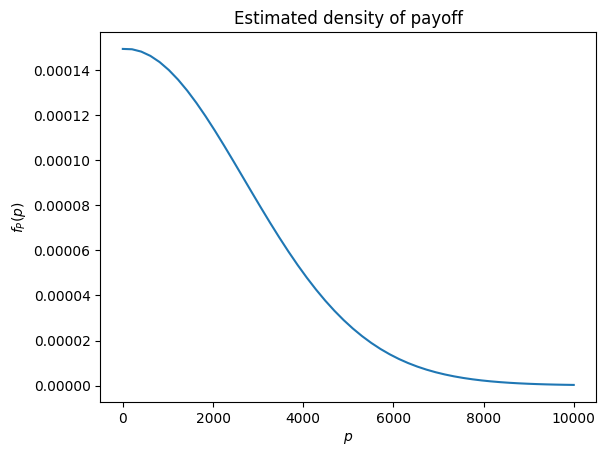

In [176]:
density = scstats.gaussian_kde(finalAmounts)
X = np.linspace(0, nGames)
Y = density.evaluate(X)
plt.plot(X, Y)
plt.xlabel(r'$p$')
plt.ylabel(r'$f_P(p)$')
_ = plt.title('Estimated density of payoff')

We will now compute the variance of payoff. To do that, we first need to compute $E(Y^2)$. Since $Y = cg^s l^{n-s}$, $Y^2 = c^2g^{2s}l^{2(n-s)}$ and
$$
E(Y^2) = \sum_{s=0}^n p(X=s) Y^2 = \sum_{s=0}^n\binom{n}{s} p^s q^{n-s} c^2 g^{2s}l^{2(n-s)} = c^2\sum_{s=0}^n (pg^2)^s (ql^2)^{n-s} = c^2(pg^2 + ql^2)^n.
$$
For $p = 1/2, g = 2, l = 1/2$,
$$
E(Y^2) = c^2\left(\frac{17}{8}\right)^n.
$$
Therefore, the variance of $Y$ is
$$
\text{Var}(Y) = E(Y^2) - E^2(Y) = c^2\left(\left(\frac{17}{8}\right)^n - \left(\frac{25}{16}\right)^n\right)
$$

In [180]:
varRatio = V[nTrials - 1]/np.var(finalAmounts)
print(f'The ratio of theoretical to measured variance is {np.round(varRatio, 2)}.')

The ratio of theoretical to measured variance is 51.54.


## Problem 3

In [191]:
nSamples = 20
nTrials = 1000
Ys = [max(rng.uniform(low=0, high=1, size=nSamples)) for n in range(nTrials)]

Given that $Y = \max\{X_1, \ldots, X_n\}$ so that $F_Y(y) = P(Y \le y) = P(X_1 \le y, \ldots X_n \le y) = y^n$ and hence the density is
$$
f_Y(y) = \frac{dF_Y}{dy} = ny^{n-1}.
$$
The mean value of $Y$ is
$$
E(Y) = \int_0^1 yf_Y(y)dy = \frac{n}{n+1}.
$$

$$
E(Y^2) = \int_0^1 y^2f_Y(y)dy = \frac{n}{n+2}
$$
so that
$$
\text{Var}(Y) = \frac{n}{n+2} - \frac{n^2}{(n+1)^2}
$$

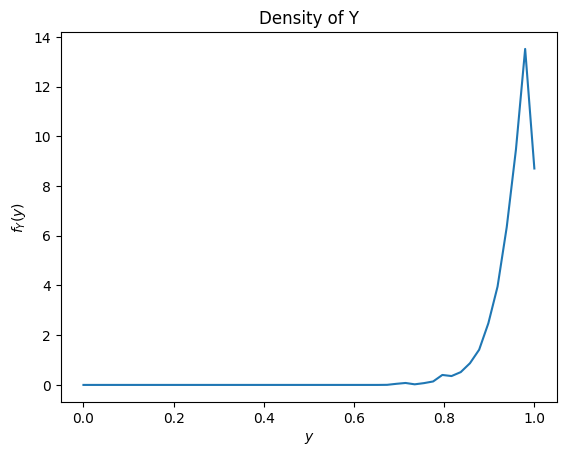

In [194]:
density = scstats.gaussian_kde(Ys)
X = np.linspace(0, 1)
Y = density.evaluate(X)
plt.plot(X, Y)
plt.xlabel(r'$y$')
plt.ylabel(r'$f_Y(y)$')
_ = plt.title('Density of Y')

In [196]:
print(f'Empirical mean = {np.mean(Ys)}')
print(f'Theoretical mean = {nSamples/(nSamples + 1)}')

Empirical mean = 0.9543499537278172
Theoretical mean = 0.9523809523809523
Empirical variance = 0.001937061176607711


In [ ]:
thVariance = nSamples/(nSamples + 2) - nSamples**2/(nSamples + 1)**2
print(f'Empirical mean = {np.mean(Ys)}')
print(f'Theoretical mean = {nSamples/(nSamples + 1)}')